In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
asso2 = pd.read_pickle('/data/ana_asso_2Hz_reci')
asso50 = pd.read_pickle('/data/ana_asso_50Hz_reci')
asso50_uni = pd.read_pickle('/data/ana_asso_50Hz_uni')

In [3]:
asso2

,Before,After,File name,elimi
139,"{'raw_amp2': [1.26492830187e-11, nan, 2.989281...","{'raw_amp2': [nan, 2.2440299524e-11, 1.3805434...",2017111401,50
140,"{'raw_amp2': [1.70250177734e-10, 1.14857567087...","{'raw_amp2': [3.4214526804e-10, 1.81794599519e...",2017111402,35
141,"{'raw_amp2': [4.79077172446e-11, 3.20369207629...","{'raw_amp2': [4.60948423777e-11, 4.16384729287...",2017111501,16
142,"{'raw_amp2': [nan, 1.15237007051e-11, 1.127271...","{'raw_amp2': [4.30126594694e-11, 4.93833020387...",2017111601,50
143,"{'raw_amp2': [2.75535103729e-11, 3.60951734936...","{'raw_amp2': [4.15294459872e-11, 3.86392607797...",2017111601,30
144,"{'raw_amp2': [nan, nan, 2.34582798594e-11, nan...","{'raw_amp2': [5.94031086627e-11, nan, 2.151754...",2017111602,17
145,"{'raw_amp2': [1.16203668535e-10, 1.37506624143...","{'raw_amp2': [2.67010062702e-10, 2.7186269038e...",2017111001,25
146,"{'raw_amp2': [1.45205360184e-10, 8.12202233324...","{'raw_amp2': [1.34173104758e-10, 1.41662378674...",2017111002,25


In [4]:
asso50

,Before,After,File name,elimi
58,"{'raw_amp2': [2.21822569476e-11, 9.4164206679e...","{'raw_amp2': [9.46673029112e-11, 6.84917584839...",2016120202,18
59,"{'raw_amp2': [3.12183220028e-11, 2.03499566457...","{'raw_amp2': [5.38919192837e-11, 7.01893775434...",2016102703,60
60,"{'raw_amp2': [2.47654762438e-11, nan, nan, 3.9...","{'raw_amp2': [2.03893269941e-11, 2.470260007e-...",2016120504,18
61,"{'raw_amp2': [5.11015196081e-11, 9.37833277719...","{'raw_amp2': [4.46787773385e-11, nan, 1.685361...",2017050902,18
62,"{'raw_amp2': [2.99351481624e-11, 2.14278288001...","{'raw_amp2': [5.08176986832e-11, 1.47135963626...",2017051001,60
63,"{'raw_amp2': [3.01016933939e-11, 5.41908023341...","{'raw_amp2': [9.34998255698e-11, 4.86178932261...",2017051002,50


In [5]:
asso50_uni

,Before,After,File name,elimi
52,"{'raw_amp2': [1.5596938858e-11, 2.03049198789e...","{'raw_amp2': [2.97014108857e-11, 2.07763387367...",2016103101,25
53,"{'raw_amp2': [5.67684968478e-11, 5.68020497921...","{'raw_amp2': [6.79334784191e-11, 8.8808347096e...",2016120503,30
54,"{'raw_amp2': [3.58356031949e-11, 2.15720196051...","{'raw_amp2': [1.11781153778e-11, 1.82869894226...",2017050901,30
55,"{'raw_amp2': [nan, 2.82190989634e-11, 5.856691...","{'raw_amp2': [7.95653250069e-11, 5.87719386041...",2017052203,28
56,"{'raw_amp2': [5.59295205257e-11, 4.99437717122...","{'raw_amp2': [6.96828736818e-11, 5.41600902774...",2016092901,30


/src/Patch_ana/Patch_ana/patch_pip.py:471: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


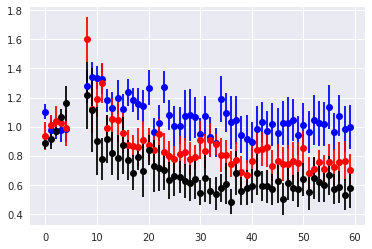

In [6]:
ave_ptl_resp = np.ones((len(asso2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2 = patch_pip.samp_ave(asso2, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(asso50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50 = patch_pip.samp_ave(asso50, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(asso50_uni), 60))*np.nan
ave_ptl_mean_50_uni,ave_ptl_ste_50_uni = patch_pip.samp_ave(asso50_uni, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

[0, 60, 0.1, 1.7]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


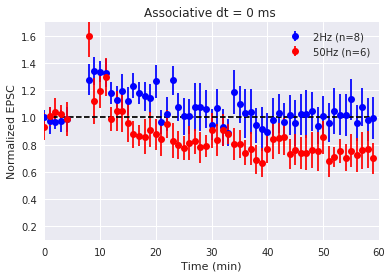

In [7]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(asso2)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(asso50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Associative dt = 0 ms ')
plt.axis([0,60,0.1,1.7])

[0, 60, 0.1, 1.7]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


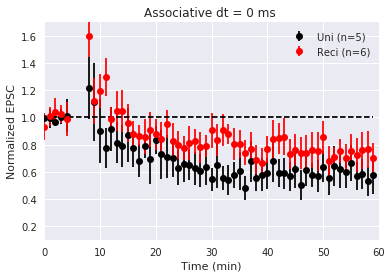

In [8]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ko', label='Uni (n={a})'.format(a=len(asso50_uni)))
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='Reci (n={a})'.format(a=len(asso50)))
plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Associative dt = 0 ms ')
plt.axis([0,60,0.1,1.7])